# A model for stock return calculation

The purpose of this model is to help us estimate, what size a stock position need to have, to be considered lucrative given the boundary conditions (investment costs & market conditions).

### Annotations:
$R$: Return<br>
$I$: Income<br>
$E$: Expenditure<br>
$_b$ or $_s$: buy or sell annotation<br>
$n$: Number of stocks<br>
$p$. Price per stock<br>
$c$: Cost per position transaction (not per stock)<br>
$m$: Total capital available<br>
$r$: Maximum risk per position<br>
$x$: Relative stock price change<br>
$\Delta x$: Uncertainty for x<br>
$<x>/<\Delta X>$: Average value of variable $x/\Delta x$<br>

### Definitions

\begin{equation*}
R = I - E \tag{1}
\end{equation*}

- <b>Assumption 1: $c_{b} \approx c_{s} = c $
\begin{equation*}
E = n_b \cdot p_{b} + c = \frac{m r - c}{p_{b}} p_{b} + c = m r \tag{2}
\end{equation*}

- <b>Assumption 2:</b> $p_{s} = (1+x)\cdot p_{b}$
\begin{equation*}
I = n_{b} \cdot p_{s} - c = \frac{m r - c}{p_{b}} p_{s} - c = \frac{m r - c}{p_{b}} (1+x)\cdot p_{b} - c\\ \tag{3}
I = (m r - c)\cdot(1+x) - c = (m r - c)\cdot(1+x) - c\\
\end{equation*}

This yields us the formula for the return:
\begin{equation}
R = (m r - c)\cdot(1+x) - c  - m r = \left[ (m r - c)\cdot x - 2c \right],
\end{equation}

having an uncertainty of

\begin{equation*}
\sigma^2_R = \left[ \Delta x \cdot (m r - c) \right]^2 \tag{4}
\end{equation*}

The ensemble return is given by:<br>
$$<R_{tot}> = \sum_{i=1}^{n} R_{i} = n \cdot \left[ \left( m r - c\right) \cdot <x> - 2c \right], \tag{5}$$

- <b>Assumption 3:</b> Weighting relative stock price change by amount invested per position $w_i = mr - c$
$$<x> = \frac{\sum_{i=1}^{n} w_i \cdot x_i}{\sum_{i=1}^{n} w_i} = \frac{\sum_{i=1}^{n} (mr - c)\cdot x_i}{\sum_{i=1}^{n} (mr - c)} \tag{6}$$

with an uncertainty for the ensemble
\begin{equation*}
<\sigma^2_{R_{tot}}> = \sum_{i=1}^{n} \sigma^2_{R,i} = \left[ (m r - c) \cdot \sqrt{n} \cdot < \Delta x>\right] \tag{7}
\end{equation*}
$$<\Delta x> = \frac{\sum_{i=1}^{n} \Delta x_i \cdot (mr - c) }{\sum_{i=1}^{n} (mr - c)} \tag{7} $$

The risk is defined by (helps us to eliminate n or r in the above formulae):
\begin{equation*}
n = \frac{1}{r} \,\,\, , \,\, r \in{(0.005, 0.05)} \tag{8}
\end{equation*}

In [9]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from matplotlib.patches import Ellipse
from matplotlib.ticker import FixedLocator
%matplotlib inline
import numpy as np

In [10]:
risk = 0.05 # maximum risk you are willing to take per position
n_pos = 1/risk
capital = 10000 # total amount of money
costs = 15 # transaction costs (buying, selling)
total_yield = 0.07 # yield = change in stock price + dividends
delta_total_yield = 0.01 # standard deviation on the yield

def R(capital, risk, cost, total_yield):
    """Expected return value"""
    return (capital * risk - cost) * total_yield - 2 * cost

def R2(capital, n_pos, cost, total_yield):
    """As R, independent of risk"""
    return (capital / n_pos - cost) * total_yield - 2 * cost

def dR(capital, risk, cost, delta_total_yield):
    """Expected uncertainty on the return value"""
    return (capital * risk - cost) * delta_total_yield

def dR2(capital, n_pos, cost, delta_total_yield):
    """As dR, independent of risk"""
    return (capital / n_pos - cost) * delta_total_yield

def R_tot(capital, risk, cost, total_yield_avg, n_pos):
    """Expected total return value"""
    return n_pos * ( (capital * risk - cost) * total_yield_avg - 2 * cost)

def R_tot2(capital, cost, total_yield_avg, n_pos):
    """As R_tot, independent of risk"""
    return ( (capital - cost * n_pos) * total_yield_avg - 2 * cost * n_pos)

def dR_tot(capital, risk, cost, delta_total_yield_avg, n_pos):
    """Expected uncertainty on R_tot"""
    return np.abs(np.sqrt(n_pos) * ( (capital * risk - cost
                    )*delta_total_yield_avg ))

def dR_tot2(capital, cost, delta_total_yield_avg, n_pos):
    """As dR_tot, independent of risk"""
    return np.abs(( (capital / np.sqrt(n_pos) - cost* np.sqrt(n_pos)
                    )*delta_total_yield_avg ))

In [11]:
# Example values

print('ROI: {:.2f} - Delta ROI: {:.2f}'.format(
    R(capital, risk, costs, total_yield
       ), dR(capital, risk, costs, delta_total_yield)
))

print('Total ROI: {:.2f} - Delta Total ROI: {:.2f}'.format(
    R_tot(capital, risk, costs, total_yield, n_pos
         ), dR_tot(capital, risk, costs, 
                            delta_total_yield, n_pos)))

ROI: 3.95 - Delta ROI: 4.85
Total ROI: 79.00 - Delta Total ROI: 21.69


# ROI

Text(0.5, 0, 'Investment per position')

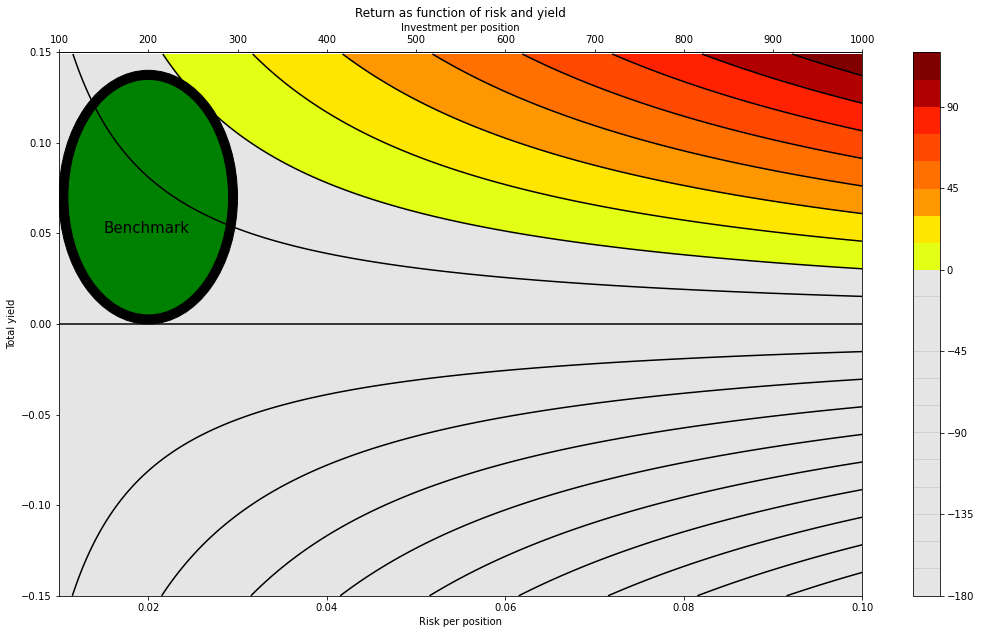

In [12]:
risks, total_yields = np.meshgrid(
                     np.arange(0.01, 0.1, 0.001), 
                     np.arange(-0.15, 0.15, 0.001) )
returns = R(capital, risks, costs, total_yields)

def r_to_c(r, capital=capital):
    return capital * r

def c_to_r(r, capital=capital):
    return r / capital

# We find, that the rule-of-thumb to invest up to 0.02 per position given the boundary conditions, 
# does not become profitable, even under exceptionally good market conditions (changes > 7% p.a.)

fig, ax = plt.subplots(figsize=(18, 10))
seismic = cm.get_cmap('jet', 25)
newcolors = seismic(np.linspace(0, 1, 25))
newcolors[:15, :] = np.array([0.5, .5, .5, 0.2])
newcmp = ListedColormap(newcolors)
cs = ax.contour(risks, total_yields, returns, levels=25, 
                cmap=cm.get_cmap('binary', 1))
cs = ax.contourf(risks, total_yields, returns, levels=25, cmap=newcmp,
                )
ax.add_patch(Ellipse([0.02, 0.07], 0.02, 0.14, edgecolor='k', 
                     facecolor='black', fill=True, alpha=1))
ax.add_patch(Ellipse([0.02, 0.07], 0.018, 0.13, edgecolor='k', 
                     facecolor='green', fill=True, alpha=1))

ax.text(0.015, 0.05, 'Benchmark', fontsize=15)

cbar = fig.colorbar(cs)
ax.set_xlabel('Risk per position')
ax.set_ylabel('Total yield')
ax.set_title('Return as function of risk and yield')
ax.set_xlim([0.01, 0.10])
ax.set_ylim([-0.15, 0.15])

secax = ax.secondary_xaxis('top', 
        functions=(r_to_c, r_to_c), )
secax.get_xaxis().set_major_locator(FixedLocator(
    np.arange(0, 10000, 100)))
secax.set_xlabel('Investment per position')

# Delta ROI

Text(0.5, 0, 'Investment per position')

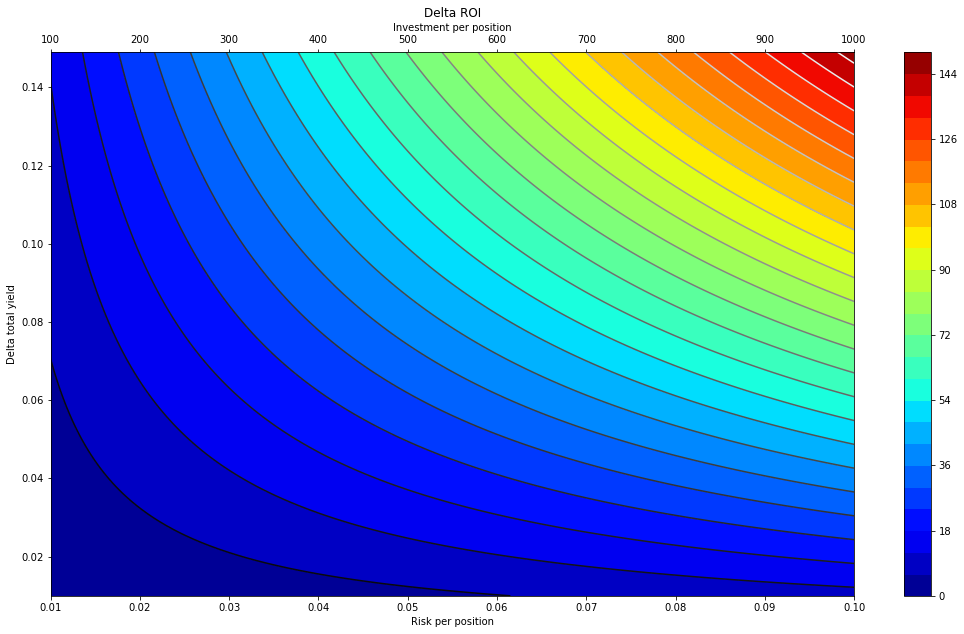

In [14]:
risks, delta_total_yields = np.meshgrid(
                     np.arange(0.01, 0.1, 0.001), 
                     np.arange(0.01, 0.15, 0.001) )
delta_returns = dR(capital, risks, costs, delta_total_yields)

fig, ax = plt.subplots(figsize=(18, 10))
cs = ax.contour(risks, delta_total_yields, delta_returns, 
                levels=25, cmap='gist_gray',
                )
cs = ax.contourf(risks, delta_total_yields, delta_returns, 
                 levels=25, cmap='jet',
                )
cbar = fig.colorbar(cs)
ax.set_xlabel('Risk per position')
ax.set_ylabel('Delta total yield')
ax.set_title('Delta ROI')

secax = ax.secondary_xaxis('top', 
        functions=(r_to_c, c_to_r), )
secax.get_xaxis().set_major_locator(FixedLocator(
    np.arange(0, 1100, 100)))
secax.set_xlabel('Investment per position')

# Total ROI

Text(0.5, 0, 'Investment per position')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


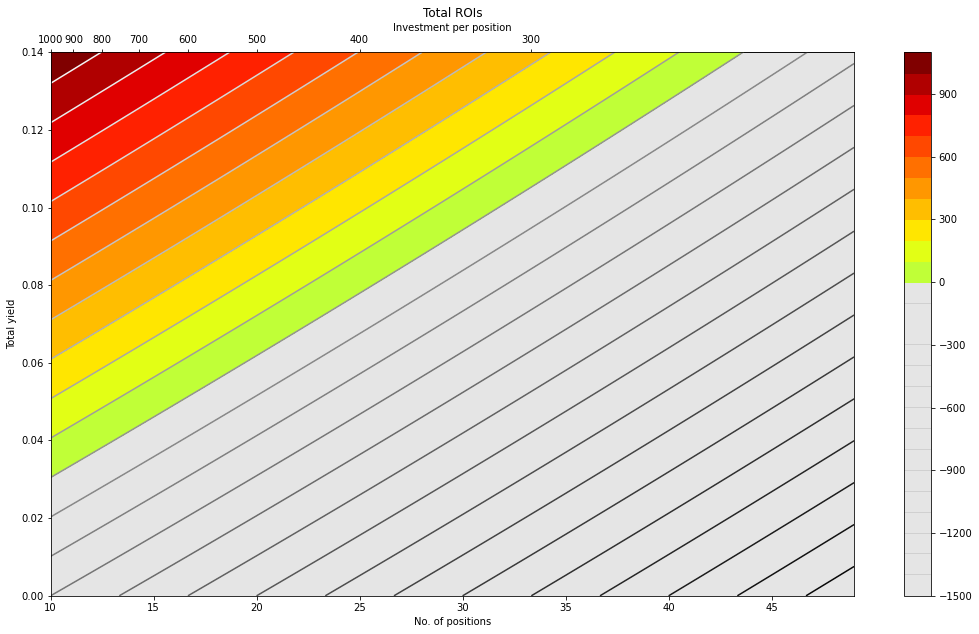

In [15]:
ns, total_yields = np.meshgrid(
                     np.arange(10, 50, 1), 
                     np.arange(0.0, 0.15, 0.01) )

returns_tot = R_tot2(capital, costs, total_yields, ns)

def n_to_c(x, capital=capital):
    return capital / x

def c_to_n(x, capital=capital):
    return x * capital

fig, ax = plt.subplots(figsize=(18, 10))


seismic = cm.get_cmap('jet', 25)
newcolors = seismic(np.linspace(0, 1, 25))
newcolors[:14, :] = np.array([0.5, .5, .5, 0.2])
newcmp = ListedColormap(newcolors)

cs = ax.contour(ns, total_yields, returns_tot, 
                levels=25, cmap='gray',
                )
cs = ax.contourf(ns, total_yields, returns_tot, 
                 levels=25, cmap=newcmp,
                )
cbar = fig.colorbar(cs)
ax.set_xlabel('No. of positions')
ax.set_ylabel('Total yield')
ax.set_title('Total ROIs')

secax = ax.secondary_xaxis('top', 
        functions=(n_to_c, n_to_c)) # the inverse function does not work properly here
secax.get_xaxis().set_major_locator(FixedLocator(
    np.arange(0, 1100, 100)))
secax.set_xlabel('Investment per position')

# Delta Total ROI

Text(0.5, 0, 'Investment per position')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


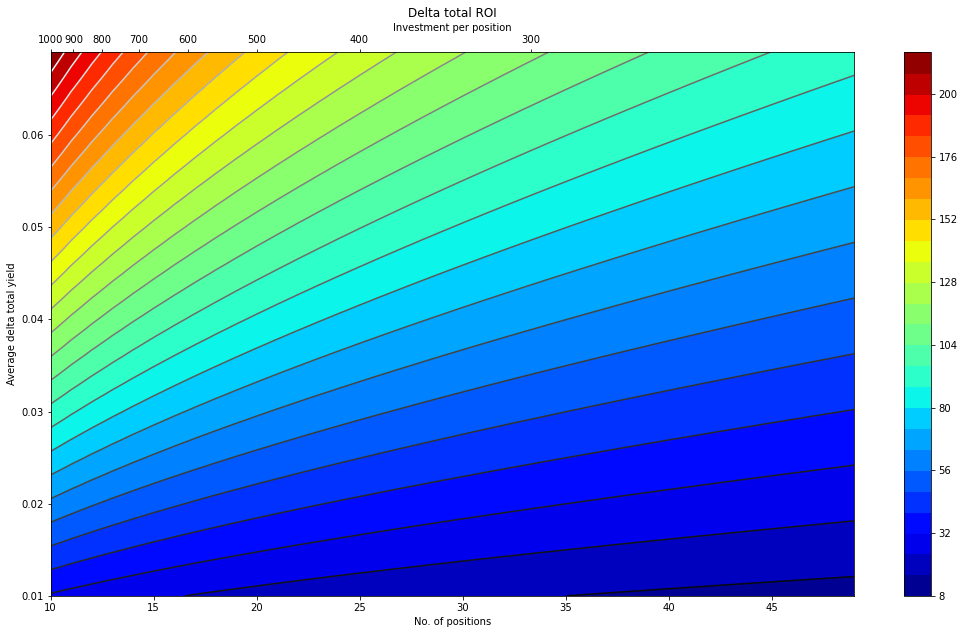

In [17]:
ns, delta_total_yields = np.meshgrid(
                     np.arange(10, 50, 1), 
                     np.arange(0.01, 0.07, 0.001) )
delta_tot_returns = dR_tot2(capital, costs, delta_total_yields, 
                            ns)

fig, ax = plt.subplots(figsize=(18, 10))
cs = ax.contour(ns, delta_total_yields, delta_tot_returns, 
                levels=25, cmap='gist_gray',
                )
cs = ax.contourf(ns, delta_total_yields, delta_tot_returns,
                 levels=25, cmap='jet',
                )
cbar = fig.colorbar(cs)
ax.set_xlabel('No. of positions')
ax.set_ylabel('Average delta total yield')
ax.set_title('Delta total ROI')

secax = ax.secondary_xaxis('top', 
        functions=(n_to_c, n_to_c), )
secax.get_xaxis().set_major_locator(FixedLocator(
    np.arange(0, 1100, 100)))
secax.set_xlabel('Investment per position')